In [2]:
import pandas as pd
import matplotlib.pyplot as plt
#import mplfinance as mpf
import glob

In [2]:
class HistoryData:
    def __init__(self,file_path):
        self.file_path=file_path
    
    # read file method
    def quotes(self):
        df=pd.read_csv(self.file_path)
        # delete no volume rows
        # df=df[df['Volume'] != 0]
        # convert col into date type
        df['Date']=pd.to_datetime(df['Date'])
        # set index
        #df.set_index('Date',inplace=True)
        # only keep the date after 1965
        #df=df['2007':]
        # drop volume and adj close
        df.drop(['Volume','Adj Close'],axis=1,inplace=True)
        return df
    
    # plot candle chart
    def candleplot(self,date):
        mc = mpf.make_marketcolors(up='g',down='r')
        s  = mpf.make_mpf_style(marketcolors=mc)
        mpf.plot(quotes.loc[date[0]:date[1]],type='candle',figratio=(15,7),title='S&P 500',style=s)

In [3]:
#read all the files 
allfiles = glob.glob('C:/Users/hr/Desktop/advanced python/project/project_data/*.csv')
stock_list=['AAPL','AMZN','BIDU','CSCO','GOOG','IBM','MSFT']
stock_dic={}
for i in range(len(allfiles)):
    stock_dic[stock_list[i]]=allfiles[i]
stock_dic

{'AAPL': 'C:/Users/hr/Desktop/advanced python/project/project_data\\AAPL.csv',
 'AMZN': 'C:/Users/hr/Desktop/advanced python/project/project_data\\AMZN.csv',
 'BIDU': 'C:/Users/hr/Desktop/advanced python/project/project_data\\BIDU.csv',
 'CSCO': 'C:/Users/hr/Desktop/advanced python/project/project_data\\CSCO.csv',
 'GOOG': 'C:/Users/hr/Desktop/advanced python/project/project_data\\GOOG.csv',
 'IBM': 'C:/Users/hr/Desktop/advanced python/project/project_data\\IBM.csv',
 'MSFT': 'C:/Users/hr/Desktop/advanced python/project/project_data\\MSFT.csv'}

In [4]:
# using for loop to automatically read all stocks files
for key in stock_dic.keys():
    #preprocess the raw data and another for loop to detect ‘Gap’.
    data=HistoryData(stock_dic[key])
    quotes=data.quotes()
    gap=['None']
    length=len(quotes['Date'])

    #to classify the ‘Gap’(up,down or none). 
    for i in range(1,length):
        if quotes.iloc[i-1]['High'] < quotes.iloc[i]['Low']:
            gap.append('up')
        elif quotes.iloc[i-1]['Low'] > quotes.iloc[i]['High']:
            gap.append('down')
        else:
            gap.append('None')
    
    #Then,put all the results in a new column called ‘Gap’
    quotes['Gap']=gap

    #same way adding a new column called 'Gap Variance'
    gap_var=[0]
    for i in range(1,length):
        if quotes.iloc[i-1]['High'] < quotes.iloc[i]['Low']:
            gap_var.append((quotes.iloc[i]['Low']-quotes.iloc[i-1]['High'])/quotes.iloc[i-1]['Close'])
        elif quotes.iloc[i-1]['Low'] > quotes.iloc[i]['High']:
            gap_var.append((quotes.iloc[i]['High']-quotes.iloc[i-1]['Low'])/quotes.iloc[i-1]['Close'])
        else:
            gap_var.append(0)

    #put all the results in a new column called ‘Gap’
    quotes['Gap Variance']=gap_var

    #filter the gap data
    df_gaps=quotes[quotes['Gap Variance']!=0]

    #find the period and record it in a list
    period=[]
    for i in range(1,length):
        if quotes.iloc[i]['Gap'] == 'down':
            gap_price=quotes.iloc[i-1]['Low']
            for j in range(i+1,length):
                if quotes.iloc[j]['High'] >= gap_price:
                    period.append(j-i)
                    break
            else:
                period.append('Not filled')
        elif quotes.iloc[i]['Gap'] == 'up':
            gap_price=quotes.iloc[i-1]['High']
            for j in range(i+1,length):
                if quotes.iloc[j]['Low'] <= gap_price:
                    period.append(j-i)
                    break
            else:
                period.append('Not filled')
    #nput this list to the DataFrame to become a new column
    df_gaps['Period']=period
    #Save the changed files
    address="C:/Users/hr/Desktop/advanced python/project/project_data2/"+ key+".csv"
    df_gaps.to_csv(address,index=False,sep=',')

D:\anaconda\lib\site-packages\ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [5]:
import glob

In [6]:
#read all the changed files 
allfiles = glob.glob('C:/Users/hr/Desktop/advanced python/project/project_data2/*.csv')
#Union all data
df = pd.concat((pd.read_csv(f) for f in allfiles))

In [18]:
df.head()

,Date,Open,High,Low,Close,Gap,Gap Variance,Period
0,2007-01-10,13.535714,13.971429,13.350000,13.857142,up,0.005077,5
1,2007-01-12,13.512857,13.580000,13.318571,13.517143,down,-0.000418,1
2,2007-01-16,13.668571,13.892858,13.635715,13.871428,up,0.004122,1
3,2007-01-18,13.157143,13.158571,12.721429,12.724286,down,-0.028541,46
4,2007-02-27,12.328571,12.440000,11.915714,11.990000,down,-0.005988,2


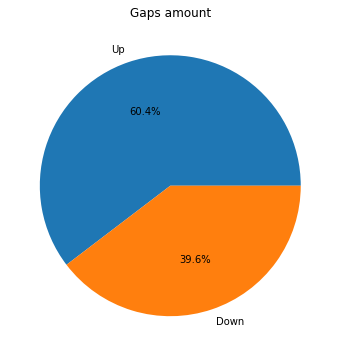

In [8]:
# plot the amount of gaps
fig, ax1=plt.subplots(figsize=(6,6))
ax1.pie(df['Gap'].value_counts(),labels=['Up','Down'],autopct='%.1f%%')
ax1.set_title('Gaps amount')

plt.show()

In [13]:
# Find the number of filled and unfilled gaps.
df.shape
df_notfilled=df[df['Period']=='Not filled']
notfilled_number=len(df_notfilled)

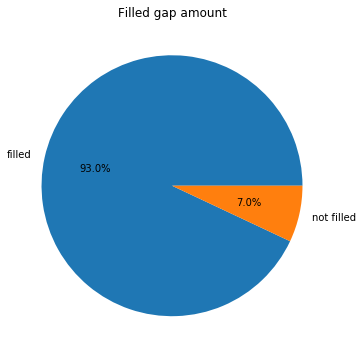

In [14]:
fig, ax1=plt.subplots(figsize=(10,6))
ax1.pie([df.shape[0],notfilled_number],labels=['filled','not filled'],autopct='%.1f%%')
ax1.set_title('Filled gap amount')

plt.show()

In [15]:
import numpy as np

# Find the average and standard deviation
gap_v_abs=df['Gap Variance'].abs()
average=np.mean(gap_v_abs)
av_std = np.std(gap_v_abs,ddof=1)
print(av_std,average)

0.016256593800234753 0.008990842161156589


In [16]:
# using the standard deviation to classify the size of gap
# gaps between 0 and 1 standard deviation are small
# gaps between 1 and 2 standard deviation are middle
# gaps larger than 2 standard deviation are large
small_0=average-av_std#(μ-σ)
small_1=average+av_std#(μ+σ)
mid_0=average-(av_std*2)#(μ-2σ)
mid_1=average+(av_std*2)#(μ+2σ)

In [19]:
gap_size=[]
for i in df['Gap Variance']:
    if i>=small_0 and i<=small_1:
        gap_size.append('small')
    elif i<small_0 and i>=mid_0:
        gap_size.append('mid')
    elif i>small_1 and i<=mid_1:
        gap_size.append('mid')
    else:
        gap_size.append('large')
df['gap_size']=gap_size

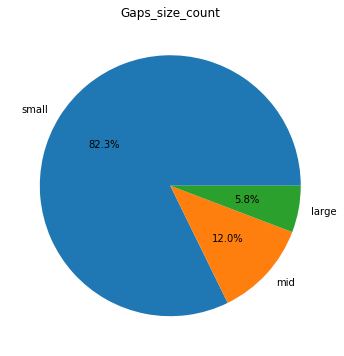

In [36]:
# plot the gap size pie chart
fig, ax1=plt.subplots(figsize=(6,6))
ax1.pie(dfa['gap_size'].value_counts(),labels=['small','mid','large'],autopct='%.1f%%')
ax1.set_title('Gaps_size_count')

plt.show()

In [21]:
df.head()

,Date,Open,High,Low,Close,Gap,Gap Variance,Period,gap_size
0,2007-01-10,13.535714,13.971429,13.350000,13.857142,up,0.005077,5,small
1,2007-01-12,13.512857,13.580000,13.318571,13.517143,down,-0.000418,1,small
2,2007-01-16,13.668571,13.892858,13.635715,13.871428,up,0.004122,1,small
3,2007-01-18,13.157143,13.158571,12.721429,12.724286,down,-0.028541,46,large
4,2007-02-27,12.328571,12.440000,11.915714,11.990000,down,-0.005988,2,small


In [23]:
# Filter all fiiled gaps
dfa=df[df['Period']!='Not filled']
dfa['Period']=dfa['Period'].astype('int64')

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
dfa=dfa.reset_index()

In [29]:
dfa.drop('index',axis=1,inplace=True)

In [31]:
dfa.head()

,Date,Open,High,Low,Close,Gap,Gap Variance,Period,gap_size
0,2007-01-10,13.535714,13.971429,13.350000,13.857142,up,0.005077,5,small
1,2007-01-12,13.512857,13.580000,13.318571,13.517143,down,-0.000418,1,small
2,2007-01-16,13.668571,13.892858,13.635715,13.871428,up,0.004122,1,small
3,2007-01-18,13.157143,13.158571,12.721429,12.724286,down,-0.028541,46,large
4,2007-02-27,12.328571,12.440000,11.915714,11.990000,down,-0.005988,2,small


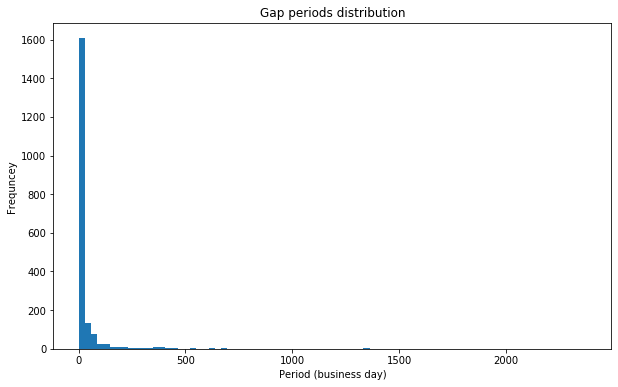

In [32]:
# plot the distribution of period
fig, ax1=plt.subplots(figsize=(10,6))
ax1.hist(dfa['Period'],bins=82)
ax1.set_title('Gap periods distribution')
ax1.set_ylabel('Frequncey')
ax1.set_xlabel('Period (business day)')

plt.show()

In [33]:
# Classify period term.
periodsize=[]
for i in range(len(dfa.index)):
    if dfa.loc[i,'Period']<=10:
        periodsize.append('short')
    elif dfa.loc[i,'Period']>=11 and dfa.loc[i,'Period']<=261:
        periodsize.append('mid')
    else:
        periodsize.append('long')

In [35]:
dfa['period_term']=periodsize
dfa.head()

,Date,Open,High,Low,Close,Gap,Gap Variance,Period,gap_size,period_term
0,2007-01-10,13.535714,13.971429,13.350000,13.857142,up,0.005077,5,small,short
1,2007-01-12,13.512857,13.580000,13.318571,13.517143,down,-0.000418,1,small,short
2,2007-01-16,13.668571,13.892858,13.635715,13.871428,up,0.004122,1,small,short
3,2007-01-18,13.157143,13.158571,12.721429,12.724286,down,-0.028541,46,large,mid
4,2007-02-27,12.328571,12.440000,11.915714,11.990000,down,-0.005988,2,small,short


In [41]:
# Find the correlation between Gap variance and Period
df_cor=dfa[['Gap Variance','Period']]
df_cor.corr()

,Gap Variance,Period
Gap Variance,1.000000,-0.014707
Period,-0.014707,1.000000


In [46]:
dfa.to_csv('C:/Users/hr/Desktop/project_data.csv')

In [ ]:
# Portfolio Optimization Test

In [3]:
import pandas as pd
import numpy as np

In [4]:
allfiles = glob.glob('C:/Users/hr/Desktop/advanced python/project/project_data/*.csv')
stock_list=['AAPL','AMZN','BIDU','CSCO','GOOG','IBM','MSFT']
stock_dic={}
for i in range(len(allfiles)):
    stock_dic[stock_list[i]]=allfiles[i]
stock_dic

{}

In [5]:
close_price_list=[]
for i in stock_dic.keys():
    df=pd.read_csv(stock_dic[i],index_col='Date')
    df=df[['Adj Close']]
    close_price_list.append(df)

In [96]:
stocks=pd.concat(close_price_list,axis=1)
stocks.columns=['appl','amzn','bidu','csco','goog','ibm','msft']
stocks.head()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,appl,amzn,bidu,csco,goog,ibm,msft
2007-01-03,10.391690,38.700001,12.241,21.264582,NaN,66.986580,22.185307
2007-01-04,10.622340,38.900002,12.600,21.824373,NaN,67.702835,22.148153
2007-01-05,10.546695,38.369999,12.250,21.832045,NaN,67.089897,22.021847
2007-01-08,10.598778,37.500000,12.195,21.954746,NaN,68.109116,22.237307
2007-01-09,11.479221,37.779999,12.372,21.832045,NaN,68.914879,22.259609


In [6]:
#Mean daily return
stocks.pct_change().mean()

NameError: name 'stocks' is not defined

In [7]:
#Corelation between return
stocks.pct_change().corr()

NameError: name 'stocks' is not defined

In [101]:
#Stock Log Return
log_return=np.log(stocks/stocks.shift(1))
log_return.head()

,appl,amzn,bidu,csco,goog,ibm,msft
2007-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-04,0.021953,0.005155,0.028906,0.025985,NaN,0.010636,-0.001676
2007-01-05,-0.007147,-0.013718,-0.028171,0.000351,NaN,-0.009095,-0.005719
2007-01-08,0.004926,-0.022935,-0.004500,0.005604,NaN,0.015078,0.009736
2007-01-09,0.079800,0.007439,0.014410,-0.005604,NaN,0.011761,0.001002


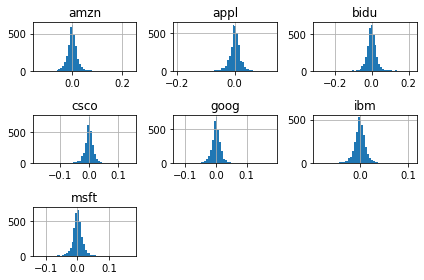

In [102]:
log_return.hist(bins=50)
plt.tight_layout()

In [103]:
#Portfolio Optimization

num_ports=5000  #number of porfolio in testing
all_weight=np.zeros((num_ports,len(stocks.columns)))
ret_arr=np.zeros(num_ports)
vol_arr=np.zeros(num_ports)
sharp_arr=np.zeros(num_ports)

for ind in range(num_ports):
    #Weight
    weights=np.array(np.random.random(7))
    weights=weights/np.sum(weights)
    #Save Weights
    all_weight[ind,:]=weights
    #Expected Return
    ret_arr[ind]=np.sum((log_return.mean())*weights*252)
    #Expected Volatility
    vol_arr[ind]=np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252,weights)))
    #Sharp Ratio
    sharp_arr[ind]=ret_arr[ind]/vol_arr[ind]

In [104]:
sharp_arr.max()
#sharp value allocation

0.8832515302536356

In [105]:
sharp_arr.argmax()

900

In [106]:
all_weight[900]

array([0.31836812, 0.41418742, 0.00131501, 0.02698131, 0.13989752,
       0.0043813 , 0.09486932])

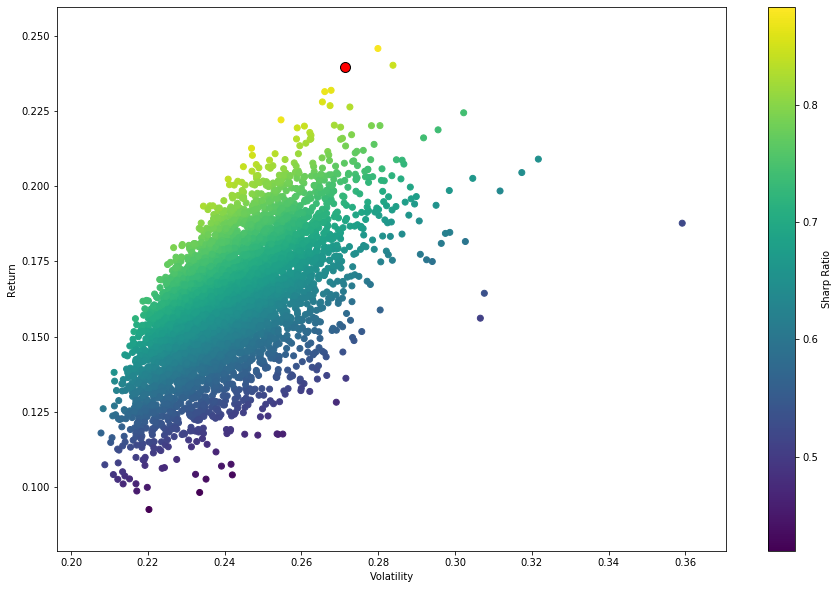

In [108]:
plt.figure(figsize=(15,10))
plt.scatter(vol_arr,ret_arr,c=sharp_arr)
plt.colorbar(label='Sharp Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

max_sr_return=ret_arr[900]
max_sr_vol=vol_arr[900]
plt.scatter(max_sr_vol,max_sr_return,c='red',s=100,edgecolor='black')